In [159]:
import requests

API_URL = "https://www.rottentomatoes.com/napi/season/{season_id}/reviews/user?{after_or_before}={cursor}&pageCount=1000"

# SQUID GAME SEASON 1
# MOVIE_ID = "c156dad3-ec06-3b36-8dd6-9368b41284e4"
# CURSOR = "eyJyZWFsbV91c2VySWQiOiJSVF9kZDE0ODM1Zi1iMzFjLTQ0NTktYTdmMi00MGMzODA3MzkwYjgiLCJlbXNJZCI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNCIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6ImMxNTZkYWQzLWVjMDYtM2IzNi04ZGQ2LTkzNjhiNDEyODRlNF9UIiwiY3JlYXRlRGF0ZSI6IjIwMjEtMTAtMTZUMjE6MTk6MTUuMzY1WiJ9"

# SQUID GAME SEASON 2
MOVIE_ID = '3f0a0478-c57a-3fc6-8ec1-e4dd8f1e41fb'
CURSOR = "eyJyZWFsbV91c2VySWQiOiJSVF82MWI1YTRkZS1mMmExLTQ3OGUtOTA1MC0zOTlkNDI1ZTE5YTQiLCJlbXNJZCI6IjNmMGEwNDc4LWM1N2EtM2ZjNi04ZWMxLWU0ZGQ4ZjFlNDFmYiIsImVtc0lkX2hhc1Jldmlld0lzVmlzaWJsZSI6IjNmMGEwNDc4LWM1N2EtM2ZjNi04ZWMxLWU0ZGQ4ZjFlNDFmYl9UIiwiY3JlYXRlRGF0ZSI6IjIwMjQtMTItMjlUMDM6MDY6MjMuMjgzWiJ9"

target_url = API_URL.format(season_id=MOVIE_ID, after_or_before="after", cursor=CURSOR)

response = requests.get(target_url)
print(len(response.json()['reviews']))
reviews = response.json()['reviews']

429


In [160]:
target_url = API_URL.format(season_id=MOVIE_ID, after_or_before="before", cursor=CURSOR)

response = requests.get(target_url)
print(len(response.json()['reviews']))
reviews.extend(response.json()['reviews'])

519


In [161]:
print(len(reviews))
import json
# with open('reviews_season1.json', 'w') as f:
#     json.dump(reviews, f)

948


In [162]:
import pandas as pd
df = pd.DataFrame(reviews)
df.head()

,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userAccountLink,userDisplayName,userRealm,userId
0,5.0,What breaks my heart is how short season 2 is....,69c680ec-1563-44c8-9fb3-0aa2b45b7ee2,False,False,False,False,5.0,"Dec 29, 2024",/profiles/DGehb2uVwh2PfB9I9kiB0Fj2uLLCwxiMLsRj...,Christine M,RT,6bd3ade8-41c5-4d8f-b7ff-2d243907ee89
1,1.0,Não entendi como estão achando bom uma tempora...,9f20c6a4-60e8-4ec0-9cd8-aaf1ac43935b,False,False,False,False,1.0,"Dec 29, 2024",/profiles/jndCdNtpduARhjwHePtpQtjrC00CdBSn1Cqo...,Carlos R,RT,ed860dde-2eed-4258-a89e-e8544a08590f
2,5.0,Just as good as the first season. More depth a...,cae3fb2d-706c-4b59-9326-32808891e632,False,False,False,False,5.0,"Dec 29, 2024",/profiles/2dqHWLi0RsJ0H94HMWCg2f18hxxCbRIJouL4...,John C,RT,04ca0c36-7be3-4f72-8224-362be8886f5a
3,3.5,After the end of the season I was just in shoc...,75b65727-5dba-476c-8a98-44f717f4d756,False,False,False,False,3.5,"Dec 29, 2024",/profiles/oOgUXehJos9YhN4ha8tRluZQF66CJrS6PSvA...,Gosho B,RT,be166df9-2d0d-43e3-9a08-3d878a509745
4,4.5,I absolutely loved both seasons 1 and 2 of Squ...,812c47bd-a7ab-4f0b-b3b6-01623a3940dc,False,False,False,False,4.5,"Dec 29, 2024",/profiles/L20UxWhgVCPOuYVIpocNriamCvvCZaimxIna...,Manisha H,RT,a6e87f4e-4ae2-47bf-89fb-141736056703


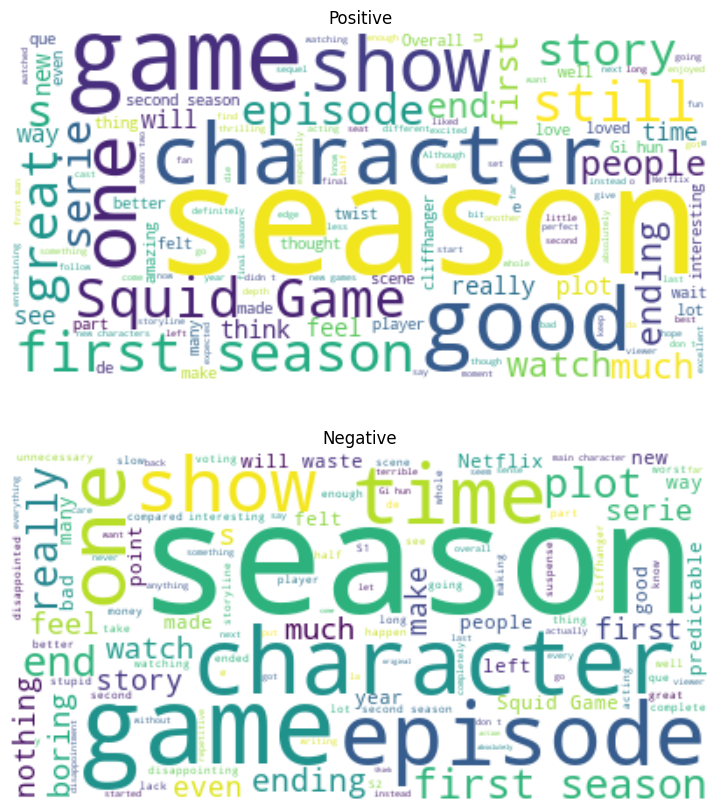

In [163]:
positive_text_dump = df[df['score'] >= 3]['quote'].str.cat(sep=' ')
negative_text_dump = df[df['score'] < 3]['quote'].str.cat(sep=' ')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate(positive_text_dump)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate(negative_text_dump)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()


In [164]:
word_df = df[['rating', 'quote']].copy()
word_df['word'] = word_df['quote'].str.split()
word_df = word_df.explode('word', ignore_index=True)
word_df = word_df.drop(columns=['quote'])
print(word_df.head())
print(len(word_df))

   rating    word
0     5.0    What
1     5.0  breaks
2     5.0      my
3     5.0   heart
4     5.0      is
54832


In [165]:
word_df['word'] = word_df['word'].str.lower()
word_df['word'] = word_df['word'].str.replace(r'[^a-zA-Z]+', '', regex=True)
# remove text_split is ''
word_df = word_df[word_df['word'] != '']
print(word_df.head(10))
print(len(word_df))

    rating    word
0      5.0    what
1      5.0  breaks
2      5.0      my
3      5.0   heart
4      5.0      is
5      5.0     how
6      5.0   short
7      5.0  season
9      5.0      is
10     5.0  please
53227


In [166]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
word_df = word_df[~word_df['word'].isin(stop_words)]
print(word_df.head(10))
print(len(word_df))

    rating    word
1      5.0  breaks
3      5.0   heart
6      5.0   short
7      5.0  season
10     5.0  please
11     5.0    make
12     5.0  season
14     5.0  longer
17     5.0    dont
18     5.0    want
29256


In [167]:
# length of word_df
print(len(word_df))
# word로 groupby 하고 rating 별로 몇번 나왔는지 카운트
word_df = word_df.groupby(['word', 'rating']).size().reset_index(name='count')
print(len(word_df))

29256
12453


In [168]:
# word_df.to_csv('word_df.csv', index=False)


In [169]:
word_df = word_df.sort_values(by='count', ascending=False)
# word_df.to_csv('word_df_sorted.csv', index=False)

In [174]:
word_df_positive = word_df[word_df['rating'] > 3]
print('positive: ', len(word_df_positive))
word_df_positive = word_df_positive.groupby('word').sum().reset_index()
word_df_positive = word_df_positive.sort_values(by='count', ascending=False)
# word_df_positive.to_csv('word_df_positive.csv', index=False)

word_df_negative = word_df[word_df['rating'] <= 3]
print('negative: ', len(word_df_negative))
word_df_negative = word_df_negative.groupby('word').sum().reset_index()
word_df_negative = word_df_negative.sort_values(by='count', ascending=False)
# word_df_negative.to_csv('word_df_negative.csv', index=False)

# check the frequency of words
# positive와 negative 모두에서 자주나오는 단어인 경우 제외.
# how to do this? -> frequncy rate 계산



positive:  6288
negative:  6165


In [171]:
threshold_positive = word_df_positive['count'].quantile(0.985)
threshold_negative = word_df_negative['count'].quantile(0.985)

common_df = pd.merge(
    word_df_positive[['word', 'count']],
    word_df_negative[['word', 'count']],
    on='word',
    how='inner',
    suffixes=('_positive', '_negative')
)

common_frequent_words = common_df[
    (common_df['count_positive'] >= threshold_positive) &
    (common_df['count_negative'] >= threshold_negative)
]['word']

print(common_frequent_words)

0         season
1          first
2           good
3          games
4           game
5     characters
6            one
7          squid
8            new
9          great
11          like
12          show
13         story
14        series
15        really
16         watch
17        people
18        second
19     character
21          much
22        ending
23          plot
26      episodes
27        better
30       episode
31           see
32           end
33         didnt
34         would
35          even
37          time
41          dont
42          many
45          also
46            de
53           way
54           get
55          felt
56           two
Name: word, dtype: object


In [172]:
word_df_positive_filtered = word_df_positive[~word_df_positive['word'].isin(common_frequent_words)]
word_df_negative_filtered = word_df_negative[~word_df_negative['word'].isin(common_frequent_words)]

word_df_positive_filtered.to_csv('filtered_word_df_positive.csv', index=False)
word_df_negative_filtered.to_csv('filtered_word_df_negative.csv', index=False)

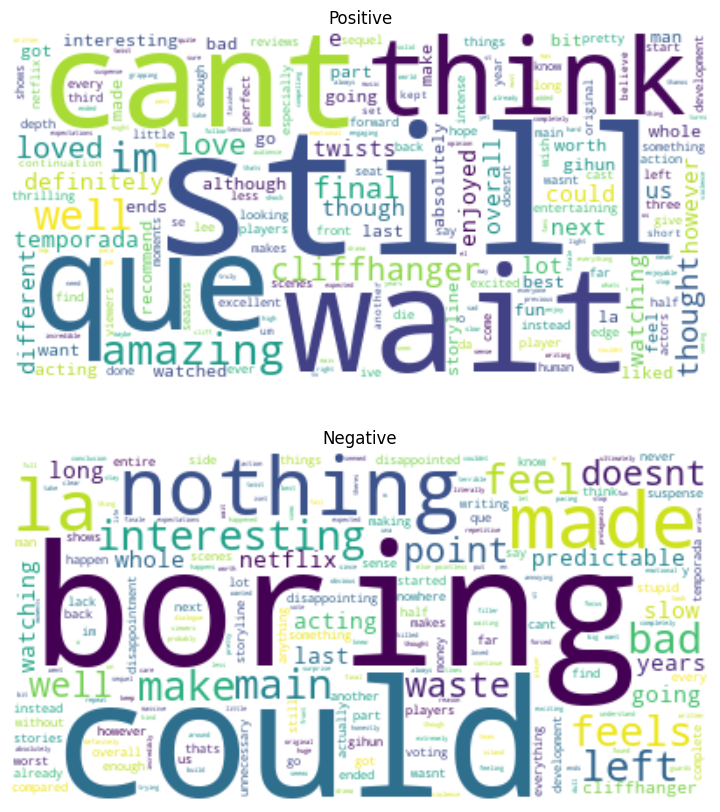

In [173]:

# df to dict
word_df_positive_filtered_dict = word_df_positive_filtered.set_index('word')['count'].to_dict()
word_df_negative_filtered_dict = word_df_negative_filtered.set_index('word')['count'].to_dict()

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate_from_frequencies(word_df_positive_filtered_dict)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate_from_frequencies(word_df_negative_filtered_dict)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()